In [ ]:
import pandas as pd

# Make sure the path to your CSV is correct
try:
    df = pd.read_csv(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 6\crediTrust_rag\complaints.csv') # Or whatever you named it
    print("--- DataFrame Info ---")
    df.info()
    print("\n--- DataFrame Columns ---")
    print(df.columns.tolist())
    print("\n--- First 3 Rows (Sample) ---")
    # Using to_markdown for cleaner formatting
    print(df.head(3).to_markdown())
except FileNotFoundError:
    print("Error: The file 'complaints.csv' was not found. Please make sure it's in the same directory.")

In [5]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

sns.set_style("whitegrid")

# Cell 2: Setup file paths and constants
RAW_DATA_PATH = r'C:\Users\Dar Computers\Desktop\10Acadamy\week 6\crediTrust_rag\complaints.csv'
FILTERED_DATA_PATH = r'C:\Users\Dar Computers\Desktop\10Acadamy\week 6crediTrust_rag\data\filtered_complaints.csv'
CHUNK_SIZE = 50000  # Process 50,000 rows at a time. Adjust based on your RAM.
TARGET_PRODUCTS = ['Credit Cards', 'Personal Loans', 'Buy Now, Pay Later (BNPL)', 'Savings Accounts', 'Money Transfers']

# Create the data directory if it doesn't exist
output_dir =r'C:\Users\Dar Computers\Desktop\10Acadamy\week 6crediTrust_rag\data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
# Cell 3: EDA on Chunks
print("Starting EDA on large file by processing in chunks...")

product_counts = pd.Series(dtype=int)
narrative_word_counts = []
total_rows = 0
rows_with_narrative = 0

# Create an iterator to read the CSV in chunks
df_iterator = pd.read_csv(RAW_DATA_PATH, chunksize=CHUNK_SIZE, low_memory=False)

for i, chunk in enumerate(df_iterator):
    print(f"Processing chunk {i+1}...")
    
    # Get total rows
    total_rows += len(chunk)
    
    # 1. Analyze product distribution
    product_counts = product_counts.add(chunk['Product'].value_counts(), fill_value=0)
    
    # 2. Analyze narrative length and count
    chunk_with_narratives = chunk.dropna(subset=['Consumer complaint narrative'])
    rows_with_narrative += len(chunk_with_narratives)
    if not chunk_with_narratives.empty:
        word_counts = chunk_with_narratives['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
        narrative_word_counts.extend(word_counts.tolist())

print("\nEDA processing complete.")

Starting EDA on large file by processing in chunks...
Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing chunk 30...
Processing chunk 31...
Processing chunk 32...
Processing chunk 33...
Processing chunk 34...
Processing chunk 35...
Processing chunk 36...
Processing chunk 37...
Processing chunk 38...
Processing chunk 39...
Processing chunk 40...
Processing chunk 41...
Processing c

--- EDA Findings ---
Total complaints analyzed: 9609797
Complaints with narrative: 2980756 (31.02%)
Complaints without narrative: 6629041 (68.98%)


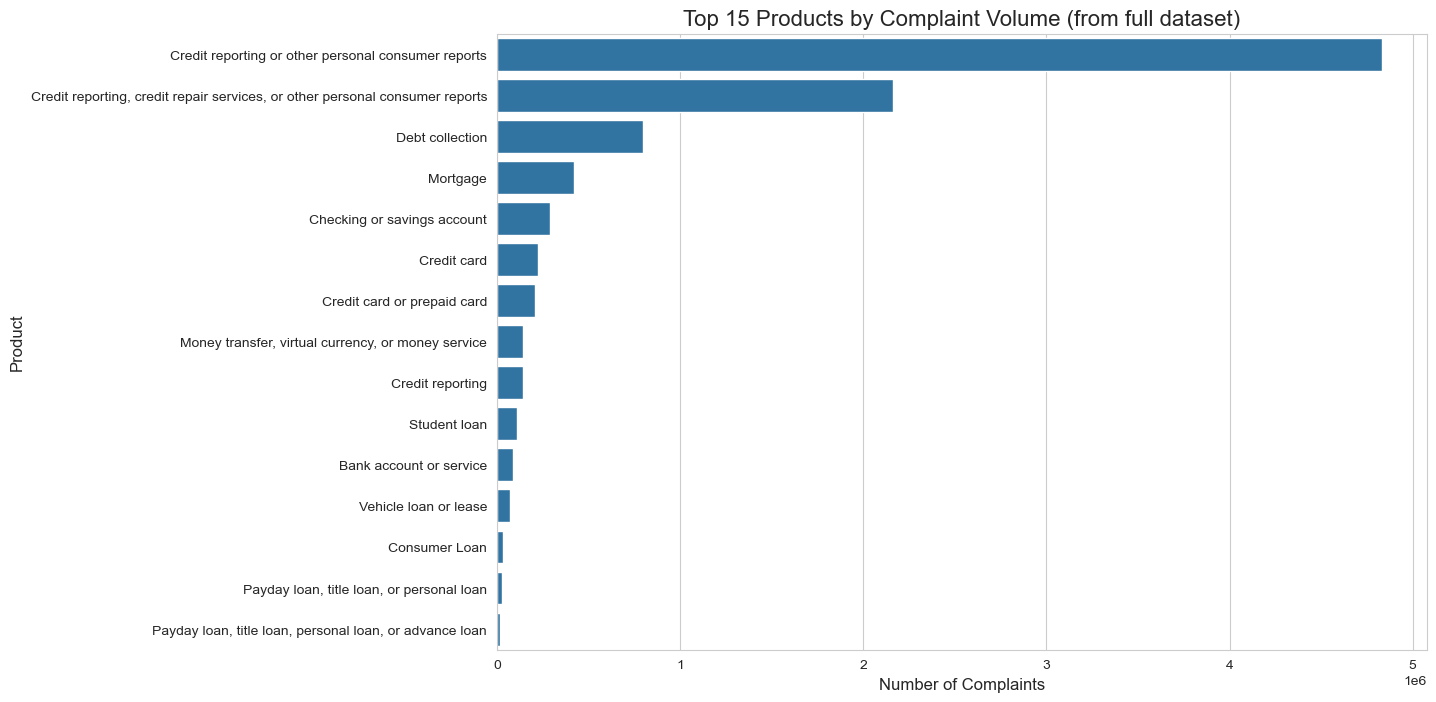

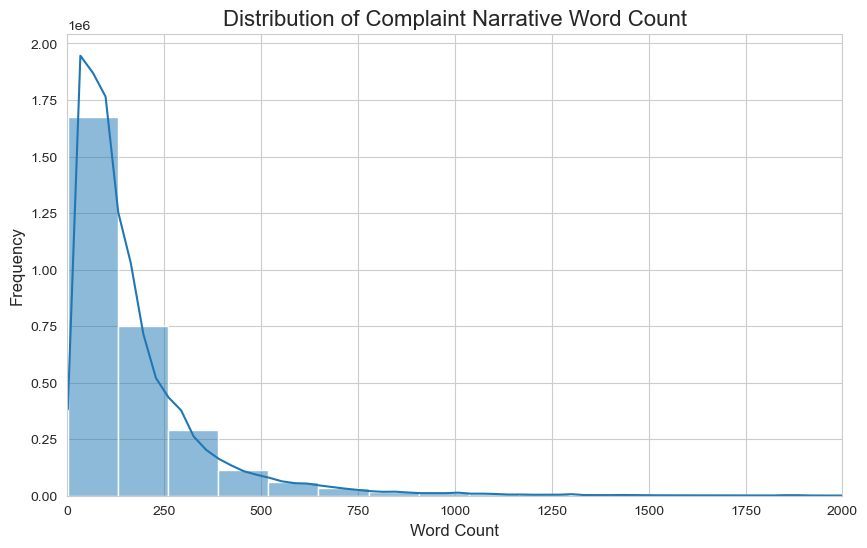


--- Narrative Length Statistics ---
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
dtype: float64


In [9]:
# Cell 4: Visualize EDA Findings
print("--- EDA Findings ---")

# 1. Complaints With vs. Without Narratives
narrative_absent = total_rows - rows_with_narrative
print(f"Total complaints analyzed: {total_rows}")
print(f"Complaints with narrative: {rows_with_narrative} ({rows_with_narrative/total_rows:.2%})")
print(f"Complaints without narrative: {narrative_absent} ({narrative_absent/total_rows:.2%})")

# 2. Plot Product Distribution
plt.figure(figsize=(12, 8))
top_15_products = product_counts.sort_values(ascending=False).head(15)
sns.barplot(y=top_15_products.index, x=top_15_products.values, orient='h')
plt.title('Top 15 Products by Complaint Volume (from full dataset)', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

# 3. Plot Narrative Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(narrative_word_counts, bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Word Count', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 2000) # Limit x-axis for visibility
plt.show()

print("\n--- Narrative Length Statistics ---")
print(pd.Series(narrative_word_counts).describe())

--- Analyzing Complaint Trends Over Time ---


C:\Users\Dar Computers\AppData\Local\Temp\ipykernel_16892\3954256752.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = df_final.groupby('Product').resample('M').size().unstack(level=0)


<Figure size 1500x800 with 0 Axes>

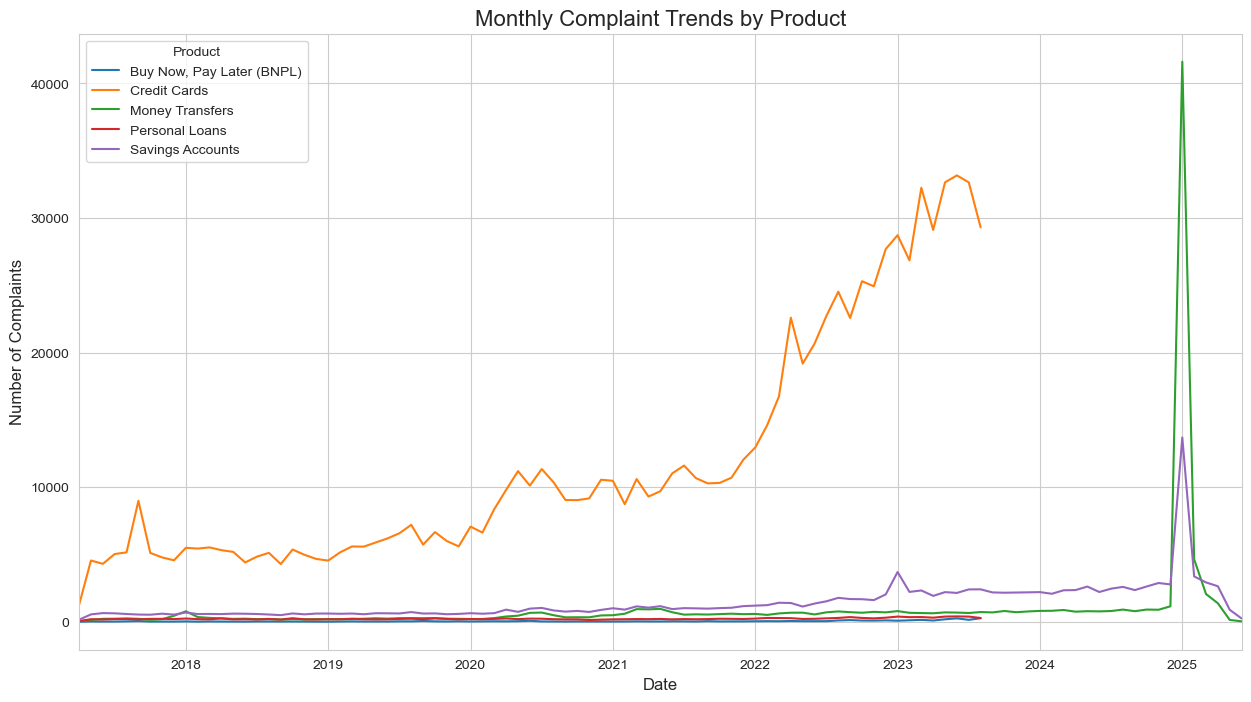

In [13]:
# This analysis should be run on the FINAL, filtered dataframe.
# If the final file is too large, this can also be adapted to a chunking method.

print("--- Analyzing Complaint Trends Over Time ---")
df_final = pd.read_csv(FILTERED_DATA_PATH)

# Convert 'Date received' to datetime objects
df_final['Date received'] = pd.to_datetime(df_final['Date received'])

# Set 'Date received' as the index for time-based resampling
df_final.set_index('Date received', inplace=True)

# Resample by month and count complaints for each product
monthly_complaints = df_final.groupby('Product').resample('M').size().unstack(level=0)

# Plotting the trends
plt.figure(figsize=(15, 8))
monthly_complaints.plot(figsize=(15, 8), grid=True)
plt.title('Monthly Complaint Trends by Product', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.legend(title='Product')
plt.show()


--- Analyzing Top Issues Per Product ---


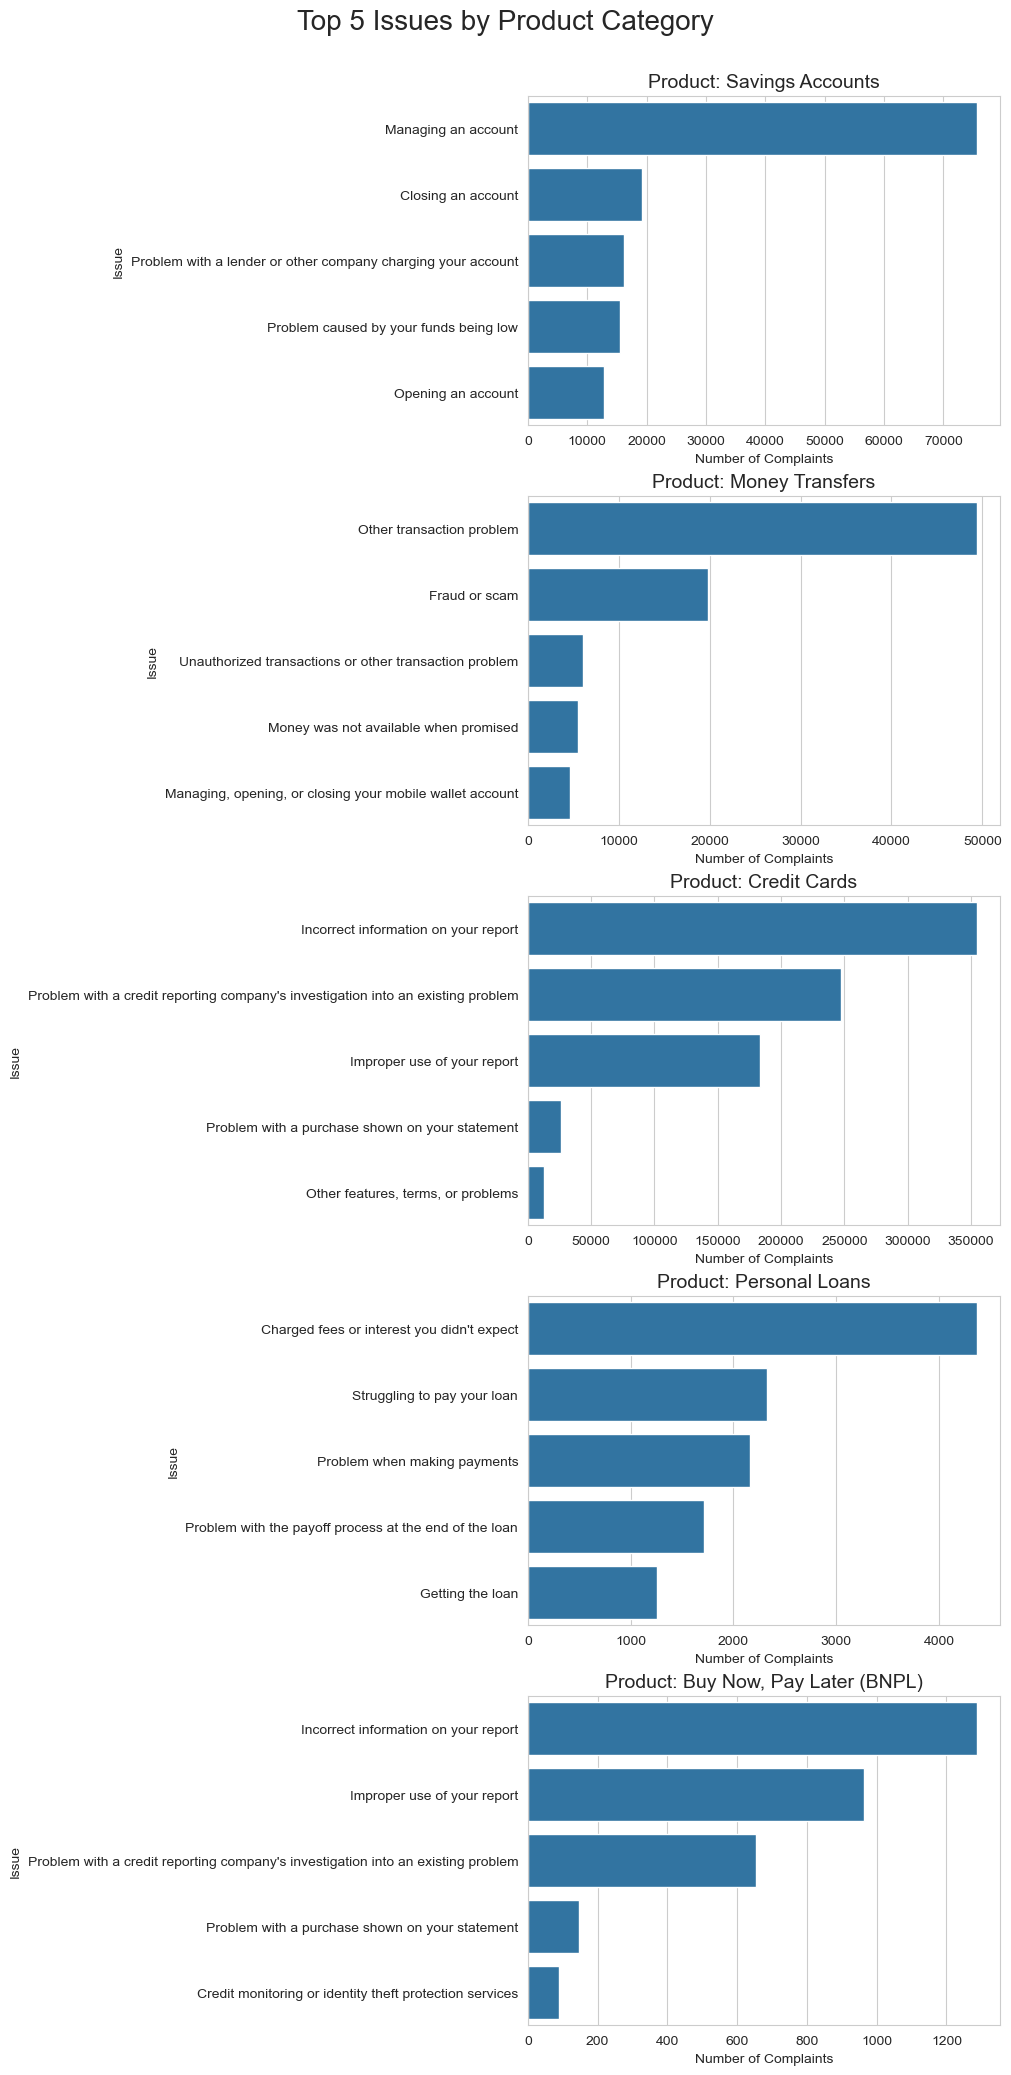

In [15]:
print("\n--- Analyzing Top Issues Per Product ---")

# We can reuse the df_final from the previous cell
# If not, load it again: df_final = pd.read_csv(FILTERED_DATA_PATH)

# Get the list of our target products
product_list = df_final['Product'].unique()

# Create subplots for each product
fig, axes = plt.subplots(nrows=len(product_list), ncols=1, figsize=(10, 20), constrained_layout=True)
fig.suptitle('Top 5 Issues by Product Category', fontsize=20, y=1.03)

for i, product in enumerate(product_list):
    # Filter for the specific product
    product_data = df_final[df_final['Product'] == product]
    
    # Get the top 5 issues
    top_issues = product_data['Issue'].value_counts().nlargest(5)
    
    # Plot
    sns.barplot(x=top_issues.values, y=top_issues.index, ax=axes[i], orient='h')
    axes[i].set_title(f'Product: {product}', fontsize=14)
    axes[i].set_xlabel('Number of Complaints')
    axes[i].set_ylabel('Issue')

plt.show()

In [10]:
# Cell 5: Full Processing and Saving Pipeline

# Define product mapping and cleaning function
product_mapping = {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Cards',
    'Credit card or prepaid card': 'Credit Cards',
    'Payday loan, title loan, or personal loan': 'Personal Loans',
    'Checking or savings account': 'Savings Accounts',
    'Money transfer, virtual currency, or money service': 'Money Transfers'
}

bnpl_keywords = 'bnpl|buy now|pay later|affirm|klarna|afterpay'

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'x{2,}', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

print("\nStarting final filtering and cleaning process...")

# Get header for the new CSV
header_written = False
columns_to_save = [
    'Date received', 'Product', 'Issue', 'Company',
    'State', 'ZIP code', 'Complaint ID', 'Consumer complaint narrative', 'cleaned_narrative'
]

# Create another iterator for the final processing
df_iterator_final = pd.read_csv(RAW_DATA_PATH, chunksize=CHUNK_SIZE, low_memory=False)

for i, chunk in enumerate(df_iterator_final):
    print(f"Filtering and cleaning chunk {i+1}...")
    
    # 1. Filter out rows with no narrative
    processed_chunk = chunk.dropna(subset=['Consumer complaint narrative']).copy()
    if processed_chunk.empty:
        continue # Skip to next chunk if no narratives

    # 2. Apply product mapping
    processed_chunk['Product'] = processed_chunk['Product'].replace(product_mapping)
    
    # 3. Create BNPL category
    bnpl_mask = (processed_chunk['Product'] == 'Credit Cards') & \
                (processed_chunk['Consumer complaint narrative'].str.contains(bnpl_keywords, case=False, na=False))
    processed_chunk.loc[bnpl_mask, 'Product'] = 'Buy Now, Pay Later (BNPL)'
    
    # 4. Filter for our target products
    processed_chunk = processed_chunk[processed_chunk['Product'].isin(TARGET_PRODUCTS)]
    if processed_chunk.empty:
        continue

    # 5. Clean text
    processed_chunk['cleaned_narrative'] = processed_chunk['Consumer complaint narrative'].apply(clean_text)
    
    # 6. Save the processed chunk to a new file
    final_chunk_to_save = processed_chunk[[col for col in columns_to_save if col in processed_chunk.columns]]
    
    if not header_written:
        # Write header only for the first chunk
        final_chunk_to_save.to_csv(FILTERED_DATA_PATH, mode='w', header=True, index=False)
        header_written = True
    else:
        # Append for subsequent chunks without the header
        final_chunk_to_save.to_csv(FILTERED_DATA_PATH, mode='a', header=False, index=False)

print(f"\nProcessing complete. Cleaned and filtered dataset saved to: {FILTERED_DATA_PATH}")

# Optional: Verify the output file
df_final = pd.read_csv(FILTERED_DATA_PATH)
print(f"\nVerification: Loaded final filtered file with shape: {df_final.shape}")
print("\nFinal product distribution:")
print(df_final['Product'].value_counts())


Starting final filtering and cleaning process...
Filtering and cleaning chunk 1...
Filtering and cleaning chunk 2...
Filtering and cleaning chunk 3...
Filtering and cleaning chunk 4...
Filtering and cleaning chunk 5...
Filtering and cleaning chunk 6...
Filtering and cleaning chunk 7...
Filtering and cleaning chunk 8...
Filtering and cleaning chunk 9...
Filtering and cleaning chunk 10...
Filtering and cleaning chunk 11...
Filtering and cleaning chunk 12...
Filtering and cleaning chunk 13...
Filtering and cleaning chunk 14...
Filtering and cleaning chunk 15...
Filtering and cleaning chunk 16...
Filtering and cleaning chunk 17...
Filtering and cleaning chunk 18...
Filtering and cleaning chunk 19...
Filtering and cleaning chunk 20...
Filtering and cleaning chunk 21...
Filtering and cleaning chunk 22...
Filtering and cleaning chunk 23...
Filtering and cleaning chunk 24...
Filtering and cleaning chunk 25...
Filtering and cleaning chunk 26...
Filtering and cleaning chunk 27...
Filtering and 

### 📊 Summary of Visual Analysis

Based on a review of the provided charts, here are the key observations from the complaint data:

---

#### **Most Reported Products**

- The vast majority of all complaints fall under the **"Credit reporting"** category.  
- This is by far the most dominant type of complaint, dwarfing other categories like **"Debt collection"** and **"Mortgage"**.  
- **Insight:** Credit reporting issues are the primary source of customer dissatisfaction in the raw data.

---

#### **Complaint Length Distribution**

- The histogram shows most customer complaint narratives are relatively short, peaking between **0 and 250 words**.  
- However, there is a **long tail**, with a significant number of very detailed complaints extending to **500, 1000, or more words**.

---

#### **Complaint Trends Over Time**

- **Credit Cards:** Complaints have been **steadily and significantly increasing** from 2017 to mid-2023.
- **Money Transfers:** Complaints were stable for years but show an **enormous, near-vertical spike** at the very end of the time period.
- **Other Products (BNPL, Personal Loans, Savings Accounts):** These have remained **relatively low and stable** in complaint volume over the years.

---

#### **Top Issues by Product**

- **Savings Accounts:** Top issue is **"Managing an account."**
- **Money Transfers:** Primary problem is **"Other transaction problem"**, followed by **"Fraud or scam."**
- **Credit Cards:** Biggest issue is **"Incorrect information on your report"** by a large margin.
- **Personal Loans:** Main complaint is **"Charged fees or interest you didn't expect."**
- **Buy Now, Pay Later (BNPL):** Number one issue is overwhelmingly **"Incorrect information on your report."**

---

✔ **Overall Insight:**  
Credit reporting issues dominate complaints, with certain products like Money Transfers showing sudden spikes that may require urgent investigation.
your report."